# Sentiment Research

By Adam Darmanin

## Literature and References

- [Empath: Understanding Topic Signals in Large-Scale Text](https://www.researchgate.net/publication/301872654_Empath_Understanding_Topic_Signals_in_Large-Scale_Text)
- [Turbo-charge your spaCy NLP pipeline](https://towardsdatascience.com/turbo-charge-your-spacy-nlp-pipeline-551435b664ad)
- [VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text](https://www.researchgate.net/publication/275828927_VADER_A_Parsimonious_Rule-based_Model_for_Sentiment_Analysis_of_Social_Media_Text)
- [VADER Github](https://github.com/cjhutto/vaderSentiment)
- [5 Lesser-Known Python Libraries for Your Next NLP Project](https://towardsdatascience.com/5-lesser-known-python-libraries-for-your-next-nlp-project-ff13fc652553)
- [The Development and Psychometric Properties of LIWC-22](https://www.liwc.app/static/documents/LIWC-22%20Manual%20-%20Development%20and%20Psychometrics.pdf)
- [AFINN Github](https://github.com/fnielsen/afinn)
- [Harvard IV-4 General Inquirer Dictionaries](https://inquirer.sites.fas.harvard.edu/homecat.htm)
- [TextBlob: Simplified Text Processing](https://textblob.readthedocs.io/en/dev/)
- [Empathy-Mental-Health](https://github.com/behavioral-data/Empathy-Mental-Health)
- [A Computational Approach to Understanding Empathy Expressed in Text-Based Mental Health Support](https://arxiv.org/pdf/2009.08441.pdf)
- [Psychological Education Health Assessment Problems Based on Improved Constructive Neural Network](https://www.frontiersin.org/articles/10.3389/fpsyg.2022.943146/full)
- [Collection of Mental Health and AI Papers](https://github.com/Sahandfer/EMPaper)


## Method

Each framework will be tested against these 2 requirements:
1. **Sentiment Analysis** and its various nuances, with specific focus on mental health.
2. **Severity of Mental Health** if it's dictionaries, lexicons, or general architecture can operate on this domain.

### VADER (Valence Aware Dictionary and sEntiment Reasoner)

Lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
It can be used to analyze the sentiment of Reddit posts (OPs) to infer mental health indicators, although with some limitations.

1. VADER provides a compound score that combines the positive, negative, and neutral scores of a text.
2. It might identify negative sentiments, which could be indicative of poor mental health - but it's not a Mental Health tool and won't capture complexity or expressions.

VADER has a compound score as unidimensional measure of sentiment for the post's text:
- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

###  LIWC-22

Linguistic Inquiry and Word Count (LIWC) is the gold standard in software for analyzing word use. Sadly it through paid licenses only.

AFINN is a sentiment analysis tool specifically designed for analyzing the sentiment of texts, particularly those found on social media platforms. Here's an overview of AFINN, its scoring mechanism, and its application in the context of social media and mental health analysis:

### AFINN

lexicon with each word assigned a sentiment score. Scoring is context-agnostic and not nuanced. Good for online slang, not for mental health domain.

1. Word and text aggragate scoring.
2. Scoring is context-agnostic and not nuanced.

AFINN has a simple scoring:
- positive sentiment: compound score >= 3
- negative sentiment: compound score <= -3

### Text Blob

Pre-trained model on large datasets for sentiment, its a black box.

1. TextBlob's sentiment analysis provides two scores: `polarity` and `subjectivity`.
2. The model is not related to mental health nor social media.

- **Polarity**: It ranges from -1 to 1, where -1 indicates a negative sentiment, 1 indicates a positive sentiment, and 0 indicates neutrality. Polarity is calculated based on the presence and combination of positive and negative words in the text.
- **Subjectivity**: This score ranges from 0 to 1. A score closer to 0 is more objective, and a score closer to 1 is more subjective. Subjectivity here refers to the expression of personal opinions, emotions, or judgments in the text, as opposed to factual information.

### Empath

Empath is a text analysis tool that works by identifying and categorizing words and phrases in a given text into different human-understandable themes or categories.
If is **different** from others, because it covers a broader range of over 200 categories such as sadness, anger, family, violence, medical_emergency, etc.

1. Scores by Category. When you pass text to Empath, it analyzes the text and maps the words and phrases to its predefined categories. Each category contains a set of related words and phrases. For example, the "anger" category might include words like "angry", "fury", "rage", etc.
2. Very flexible, can be applied for mental health and reddit.

Scoring:
- Empath counts the occurrences of words and phrases in the text that fall into each category. The score for a category is the count of these occurrences. If a piece of text does not contain any words related to a certain category, the score for that category will be zero. This count is normalized accroding to document lenght.
- Scores have to be interpreted or copmared to a baseline.

In [1]:
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
import nltk
from tqdm import tqdm

from lib.sanitze_util import clean_text_batch

tqdm.pandas()
nltk.download("vader_lexicon")

df = pd.read_csv("./data/depression-sample.csv")
sia = SentimentIntensityAnalyzer()

df = df.dropna(subset=["body"])
df["body"] = df["body"].astype(str)
df = df[
    (df["body"].str.len() > 2) & (
        ~df["body"].str.contains("\[deleted\]", na=False))
]

cleaned_texts = clean_text_batch(df["body"], multi_proc=True)

df["cleaned_body"] = cleaned_texts
df[["body", "cleaned_body"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adamd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Cleaning Pipeline Token: 100%|██████████| 3457/3457 [00:33<00:00, 102.29it/s] 


,body,cleaned_body
0,I agree. Part of the problem is understanding ...,agree problem understanding solution geting wa...
1,"I don't know if it helps, but I get how you fe...",know helps feel relate said like think good pe...
2,Anytime. I'm old soul though.,anytime old soul
3,Why do you want to be like everyone else?.. Ma...,want like maybe need envision path low self es...
4,"Wellbutrin takes some time getting used to, bu...",wellbutrin takes time getting fine month notic...
...,...,...
4993,"From reading your post, it seems that the reas...",reading post reason want kill terrible problem...
4995,Thanks. Just being able to tell someone really...,thanks able tell helps 18 getting money grew p...
4996,&gt;The problem is that first i hate my person...,problem hate personality second think accept a...
4997,Hey there. How are you?,hey


In [2]:
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score["compound"] if score is not None else np.NaN


sentiments = [
    get_vader_sentiment(text)
    for text in tqdm(cleaned_texts, desc="Analysing Sentiment (VADER)")
]

df["VADER"] = sentiments
df[["body", "cleaned_body", "VADER"]]

Analysing Sentiment (VADER): 100%|██████████| 3457/3457 [00:01<00:00, 2462.23it/s]


,body,cleaned_body,VADER
0,I agree. Part of the problem is understanding ...,agree problem understanding solution geting wa...,0.8020
1,"I don't know if it helps, but I get how you fe...",know helps feel relate said like think good pe...,0.8658
2,Anytime. I'm old soul though.,anytime old soul,0.0000
3,Why do you want to be like everyone else?.. Ma...,want like maybe need envision path low self es...,0.9964
4,"Wellbutrin takes some time getting used to, bu...",wellbutrin takes time getting fine month notic...,0.4767
...,...,...,...
4993,"From reading your post, it seems that the reas...",reading post reason want kill terrible problem...,-0.9517
4995,Thanks. Just being able to tell someone really...,thanks able tell helps 18 getting money grew p...,0.9300
4996,&gt;The problem is that first i hate my person...,problem hate personality second think accept a...,-0.9949
4997,Hey there. How are you?,hey,0.0000


In [3]:
vader_df = df[["body", "VADER"]]
vader_df = vader_df.sort_values(by="VADER", ascending=False)


top_vader_df = vader_df.head(5)
bottom_vader_df = vader_df.tail(5)
top_vader_df["body"].values, bottom_vader_df["body"].values

(array(['Alaska was really cool.  I was pretty young since that\'s where I started school, but I remember that the sun was ALWAYS up during the summer (I had to put newspapers over my windows because it\'d look like morning when it was midnight), and it was always night during the winter(which made for fun school days).  We had moose hanging out in our backyard all the time.\n\nLol I went with computers since it\'s the only other thing I could think of that I like/am really good with.  My family sees me as the computer fixer: whenever someone\'s having issues, they come to me.  So I knew right off the bat that I wouldn\'t have too much trouble getting into computer in college.\n\nBack in high school, I had the same person that I have now.  Her and I have been best friends for over 6 years now XD  It\'s really nice talking to her, but I always worry that she\'ll get tired if I came to her too much.  As you can see, I can chat people\'s ear off if given the opportunity.\n\nShe\'s literal

In [4]:
from afinn import Afinn

afinn = Afinn()


def get_afinn_sentiment(text):
    return afinn.score(text)


sentiments = [
    get_afinn_sentiment(text)
    for text in tqdm(cleaned_texts, desc="Analysing Sentiment (Afinn)")
]

df["Afinn"] = sentiments
df[["body", "cleaned_body", "Afinn", "VADER"]]

Analysing Sentiment (Afinn): 100%|██████████| 3457/3457 [00:02<00:00, 1218.20it/s]


,body,cleaned_body,Afinn,VADER
0,I agree. Part of the problem is understanding ...,agree problem understanding solution geting wa...,2.0,0.8020
1,"I don't know if it helps, but I get how you fe...",know helps feel relate said like think good pe...,15.0,0.8658
2,Anytime. I'm old soul though.,anytime old soul,0.0,0.0000
3,Why do you want to be like everyone else?.. Ma...,want like maybe need envision path low self es...,42.0,0.9964
4,"Wellbutrin takes some time getting used to, bu...",wellbutrin takes time getting fine month notic...,3.0,0.4767
...,...,...,...,...
4993,"From reading your post, it seems that the reas...",reading post reason want kill terrible problem...,-11.0,-0.9517
4995,Thanks. Just being able to tell someone really...,thanks able tell helps 18 getting money grew p...,9.0,0.9300
4996,&gt;The problem is that first i hate my person...,problem hate personality second think accept a...,-44.0,-0.9949
4997,Hey there. How are you?,hey,0.0,0.0000


In [5]:
from textblob import TextBlob


def get_blob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment


sentiments = [
    get_blob_sentiment(text)
    for text in tqdm(cleaned_texts, desc="Analysing Sentiment (Blob)")
]


df["Blob"] = sentiments
df[["body", "cleaned_body", "Blob", "Afinn", "VADER"]]

Analysing Sentiment (Blob): 100%|██████████| 3457/3457 [00:01<00:00, 2770.06it/s]


,body,cleaned_body,Blob,Afinn,VADER
0,I agree. Part of the problem is understanding ...,agree problem understanding solution geting wa...,"(-0.13333333333333333, 0.52)",2.0,0.8020
1,"I don't know if it helps, but I get how you fe...",know helps feel relate said like think good pe...,"(0.07708333333333334, 0.4)",15.0,0.8658
2,Anytime. I'm old soul though.,anytime old soul,"(0.1, 0.2)",0.0,0.0000
3,Why do you want to be like everyone else?.. Ma...,want like maybe need envision path low self es...,"(0.17666666666666664, 0.5702777777777778)",42.0,0.9964
4,"Wellbutrin takes some time getting used to, bu...",wellbutrin takes time getting fine month notic...,"(0.4083333333333334, 0.7)",3.0,0.4767
...,...,...,...,...,...
4993,"From reading your post, it seems that the reas...",reading post reason want kill terrible problem...,"(-0.3055555555555556, 0.75)",-11.0,-0.9517
4995,Thanks. Just being able to tell someone really...,thanks able tell helps 18 getting money grew p...,"(0.12244318181818184, 0.5562499999999999)",9.0,0.9300
4996,&gt;The problem is that first i hate my person...,problem hate personality second think accept a...,"(-0.20128968253968255, 0.6700113378684807)",-44.0,-0.9949
4997,Hey there. How are you?,hey,"(0.0, 0.0)",0.0,0.0000


In [6]:
from empath import Empath

lexicon = Empath()

def get_empath_sentiment(text):
    return lexicon.analyze(
        text, categories=["positive_emotion", "negative_emotion"], normalize=True
    )
sentiments = [
    get_empath_sentiment(text)
    for text in tqdm(cleaned_texts, desc="Analysing Sentiment (Empath)")
]
df["Empath"] = sentiments
df[["body", "cleaned_body", "Empath", "Blob", "Afinn", "VADER"]]

Analysing Sentiment (Empath): 100%|██████████| 3457/3457 [00:00<00:00, 13347.61it/s]


,body,cleaned_body,Empath,Blob,Afinn,VADER
0,I agree. Part of the problem is understanding ...,agree problem understanding solution geting wa...,"{'positive_emotion': 0.047619047619047616, 'ne...","(-0.13333333333333333, 0.52)",2.0,0.8020
1,"I don't know if it helps, but I get how you fe...",know helps feel relate said like think good pe...,"{'positive_emotion': 0.0625, 'negative_emotion...","(0.07708333333333334, 0.4)",15.0,0.8658
2,Anytime. I'm old soul though.,anytime old soul,"{'positive_emotion': 0.0, 'negative_emotion': ...","(0.1, 0.2)",0.0,0.0000
3,Why do you want to be like everyone else?.. Ma...,want like maybe need envision path low self es...,"{'positive_emotion': 0.08695652173913043, 'neg...","(0.17666666666666664, 0.5702777777777778)",42.0,0.9964
4,"Wellbutrin takes some time getting used to, bu...",wellbutrin takes time getting fine month notic...,"{'positive_emotion': 0.0, 'negative_emotion': ...","(0.4083333333333334, 0.7)",3.0,0.4767
...,...,...,...,...,...,...
4993,"From reading your post, it seems that the reas...",reading post reason want kill terrible problem...,"{'positive_emotion': 0.03571428571428571, 'neg...","(-0.3055555555555556, 0.75)",-11.0,-0.9517
4995,Thanks. Just being able to tell someone really...,thanks able tell helps 18 getting money grew p...,"{'positive_emotion': 0.0625, 'negative_emotion...","(0.12244318181818184, 0.5562499999999999)",9.0,0.9300
4996,&gt;The problem is that first i hate my person...,problem hate personality second think accept a...,"{'positive_emotion': 0.047619047619047616, 'ne...","(-0.20128968253968255, 0.6700113378684807)",-44.0,-0.9949
4997,Hey there. How are you?,hey,"{'positive_emotion': 0.0, 'negative_emotion': ...","(0.0, 0.0)",0.0,0.0000


In [7]:
text, e, b, a, v = df[["body", "Empath", "Blob", "Afinn", "VADER"]].iloc[5]
text, e, b, a, v

('I can sympathize.  My dream is to live in South Korea to pick up the language and experience a different culture.  I have no degree, no money, and no skills. ',
 {'positive_emotion': 0.07692307692307693, 'negative_emotion': 0.0},
 Sentiment(polarity=0.06818181818181818, subjectivity=0.55),
 1.0,
 0.25)

In [8]:
from empath import Empath

lexicon = Empath()


def get_empath_categories(text):
    return lexicon.analyze(text, normalize=True)


cats = [
    get_empath_categories(text)
    for text in tqdm(cleaned_texts, desc="Analysing Sentiment (Empath)")
]


df["cats"] = cats
empath_df = df[["body", "cats"]]
empath_df

Analysing Sentiment (Empath): 100%|██████████| 3457/3457 [00:27<00:00, 124.76it/s]


,body,cats
0,I agree. Part of the problem is understanding ...,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
1,"I don't know if it helps, but I get how you fe...","{'help': 0.03125, 'office': 0.0, 'dance': 0.0,..."
2,Anytime. I'm old soul though.,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
3,Why do you want to be like everyone else?.. Ma...,"{'help': 0.021739130434782608, 'office': 0.0, ..."
4,"Wellbutrin takes some time getting used to, bu...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
...,...,...
4993,"From reading your post, it seems that the reas...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."
4995,Thanks. Just being able to tell someone really...,"{'help': 0.015625, 'office': 0.0, 'dance': 0.0..."
4996,&gt;The problem is that first i hate my person...,"{'help': 0.015873015873015872, 'office': 0.0, ..."
4997,Hey there. How are you?,"{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo..."


Empath is of interest, it is able to create a matrix of categories the text can go to, additionally we can create our own categories which it will train agains a reddit model.


100%|██████████| 3457/3457 [00:01<00:00, 3013.95it/s]


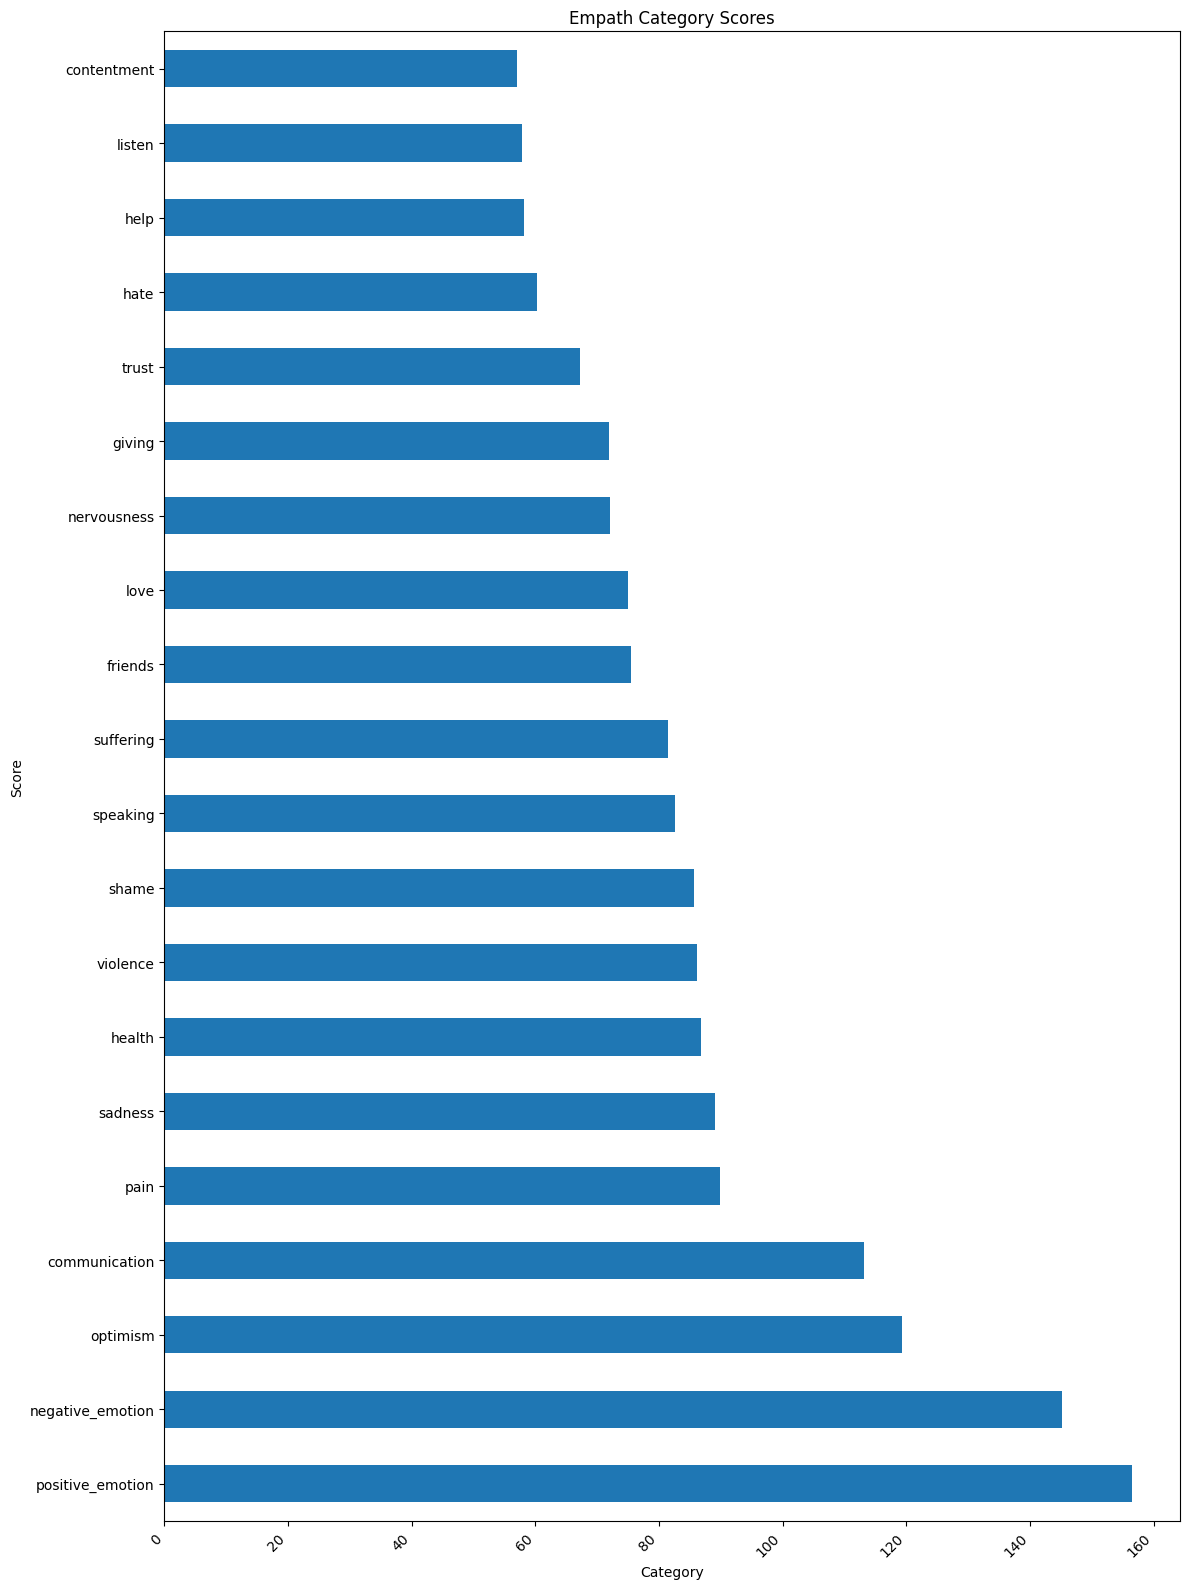

In [9]:
import matplotlib.pyplot as plt

agg_cats = empath_df["cats"].progress_apply(pd.Series).sum()
agg_cats = agg_cats[agg_cats > 20]
agg_cats = agg_cats.sort_values(ascending=False)

top_20_cats = agg_cats.head(20)

plt.figure(figsize=(12, 16))
top_20_cats.plot(kind="barh")
plt.xlabel("Category")
plt.ylabel("Score")
plt.title("Empath Category Scores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [10]:
df_empath_scores = empath_df["cats"].progress_apply(pd.Series)
max_score_texts = {}
for category in top_20_cats.index:
    max_idx = df_empath_scores[category].idxmax()
    max_score_texts[category] = df.loc[max_idx, "body"]

max_score_texts

100%|██████████| 3457/3457 [00:01<00:00, 3409.22it/s]


{'positive_emotion': 'you have to hope it will',
 'negative_emotion': 'Lie about being sad.',
 'optimism': 'What do you enjoy doing?',
 'communication': 'Talk to me :)',
 'pain': 'How are you feeling now?',
 'sadness': "I can't say this with enough emotion but.. HERE. HERE.",
 'health': 'psychiatrist. ',
 'violence': "No, I'm more afraid that they just won't say anything.",
 'shame': "I can't say this with enough emotion but.. HERE. HERE.",
 'speaking': 'Talk to me :)',
 'suffering': 'How are you feeling now?',
 'friends': '"Fun"? :(',
 'love': "I can't say this with enough emotion but.. HERE. HERE.",
 'nervousness': "I can't say this with enough emotion but.. HERE. HERE.",
 'giving': 'Thank you so much!',
 'trust': "I don't deserve to be",
 'hate': "I can't say this with enough emotion but.. HERE. HERE.",
 'help': 'Nobody that can help. ',
 'listen': 'Talk to me :)',
 'contentment': 'How are you feeling now?'}